In [27]:
%matplotlib widget
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import sys
sys.path.append('/staff/quentin/Documents/Projects/2024_Venus_Detectability/Venus_Detectability')
import proba_modules as pm
reload(pm)

<module 'proba_modules' from '/staff/quentin/Documents/Projects/2024_Venus_Detectability/Venus_Detectability/proba_modules.py'>

In [42]:
Vs = 3500. # shear wave velocity (m/s)
n = 2. # Fall off rate

mws = np.linspace(3, 8., 100)
freqs = np.logspace(-2, 0, 50)
MWS, FREQS = np.meshgrid(mws, freqs)

delta_sigma = 3. # Stress drop (MPa)
FC = pm.corner_frequency(MWS, delta_sigma, Vs, Cs=0.32)
COEFS_BRUNE = pm.brune_spectrum(FREQS, FC, n=n)

delta_sigma = 6. # Stress drop (MPa)
FC_sigma_large = pm.corner_frequency(MWS, delta_sigma, Vs, Cs=0.32)
COEFS_BRUNE_sigma_large = pm.brune_spectrum(FREQS, FC_sigma_large, n=n)

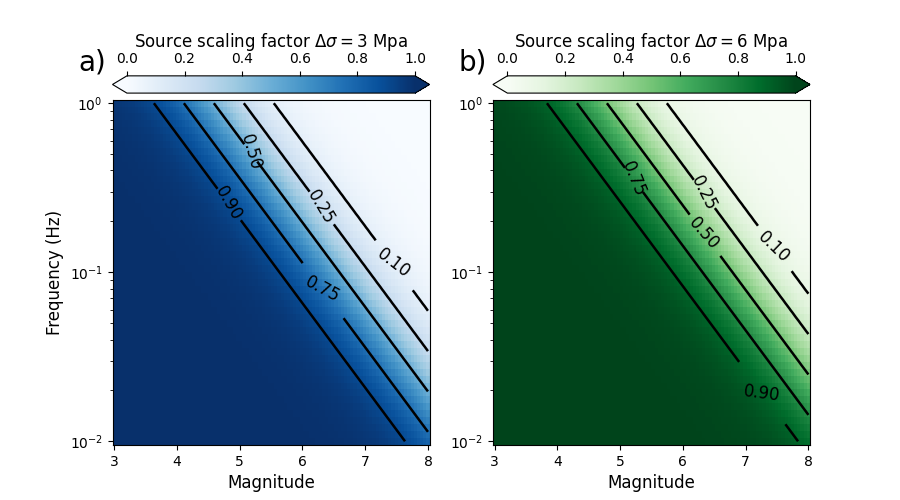

In [47]:
fig = plt.figure(figsize=(9,5))
grid = fig.add_gridspec(1, 2)

ax = fig.add_subplot(grid[0, 0])

sc = ax.pcolormesh(MWS, FREQS, COEFS_BRUNE, cmap='Blues', vmin=0., vmax=1.)
contours = ax.contour(MWS, FREQS, COEFS_BRUNE, levels=[0.1, 0.25, 0.5, 0.75, 0.9], colors='black', linewidths=1.8)
ax.clabel(contours, inline=True, fontsize=12)

ax.set_xlabel('Magnitude', fontsize=12.)
ax.set_ylabel('Frequency (Hz)', fontsize=12.)
ax.set_yscale('log')
ax.text(-0.02, 1.15, f'a)', fontsize=20., ha='right', va='top', transform=ax.transAxes)

ax_cbar = inset_axes(ax, width="100%", height="5%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1.), bbox_transform=ax.transAxes, borderpad=0)
ax_cbar.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)
cbar = plt.colorbar(sc, cax=ax_cbar, extend='both', orientation='horizontal')
cbar.ax.set_xlabel('Source scaling factor $\Delta\sigma=3$ Mpa', fontsize=12.)
cbar.ax.tick_params(axis='both', which='both', labelbottom=False, bottom=False, labeltop=True, top=True)
cbar.ax.xaxis.set_label_position('top')

ax = fig.add_subplot(grid[0, 1])

sc = ax.pcolormesh(MWS, FREQS, COEFS_BRUNE_sigma_large, cmap='Greens', vmin=0., vmax=1.)
contours = ax.contour(MWS, FREQS, COEFS_BRUNE_sigma_large, levels=[0.1, 0.25, 0.5, 0.75, 0.9], colors='black', linewidths=1.8)
ax.clabel(contours, inline=True, fontsize=12)

ax.set_xlabel('Magnitude', fontsize=12.)
#ax.set_ylabel('Frequency (Hz)', fontsize=12.)
ax.set_yscale('log')
ax.text(-0.02, 1.15, f'b)', fontsize=20., ha='right', va='top', transform=ax.transAxes)

ax_cbar = inset_axes(ax, width="100%", height="5%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1.), bbox_transform=ax.transAxes, borderpad=0)
ax_cbar.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)
cbar = plt.colorbar(sc, cax=ax_cbar, extend='both', orientation='horizontal')
cbar.ax.set_xlabel('Source scaling factor $\Delta\sigma=6$ Mpa', fontsize=12.)
cbar.ax.tick_params(axis='both', which='both', labelbottom=False, bottom=False, labeltop=True, top=True)
cbar.ax.xaxis.set_label_position('top')

fig.subplots_adjust(top=0.8)

plt.savefig('./figures/brune_coefs.pdf')